In [1]:
import numpy as np
from scipy.optimize import minimize
import statsmodels.api as sm

x_values = np.array([0, 0.25, 0.5, 1])

def objective_function(params):
    beta_0, beta_1 = params

    term_1 = 0.25 * np.log(1 / (1 + np.exp(-beta_0 - beta_1 * x_values[0])))
    term_2 = 0.25 * np.log(1 - 1 / (1 + np.exp(-beta_0 - beta_1 * x_values[1])))
    term_3 = 0.25 * np.log(1 - 1 / (1 + np.exp(-beta_0 - beta_1 * x_values[2])))
    term_4 = 0.25 * np.log(1 / (1 + np.exp(-beta_0 - beta_1 * x_values[3])))

    return -(term_1 + term_2 + term_3 + term_4)  # Negate for maximization

initial_guess = [0, 0]

result = minimize(objective_function, initial_guess, method='Nelder-Mead', options={'xatol': 1e-6, 'maxiter': 1000})

optimal_beta_0, optimal_beta_1 = result.x
optimal_value = -result.fun

print("Optimal beta_0:", optimal_beta_0)
print("Optimal beta_1:", optimal_beta_1)
print("Maximum value:", optimal_value)

logistic_values = 1 / (1 + np.exp(-optimal_beta_0 - x_values * optimal_beta_1))
print("Logistic function values:", logistic_values)

mean_abs_diff = np.mean(np.abs(logistic_values - 0.5))
print("Mean absolute difference from 0.5:", mean_abs_diff)

np.random.seed(42)
n = 1000000
X = np.random.choice(x_values, size=n, replace=True)
Y = np.zeros(n)
Y[(X == 0) | (X == 1)] = 1

X = sm.add_constant(X)
model = sm.Logit(Y, X).fit()
print(model.summary())


Optimal beta_0: -0.40580436961548944
Optimal beta_1: 0.9308952052419281
Maximum value: -0.6787331334363444
Logistic function values: [0.39991858 0.45683756 0.51490639 0.6283374 ]
Mean absolute difference from 0.5: 0.07162191394250322
Optimization terminated successfully.
         Current function value: 0.678788
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999998
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 Feb 2025   Pseudo R-squ.:                 0.02072
Time:                        19:34:48   Log-Likelihood:            -6.7879e+05
converged:                       True   LL-Null:                   -6.9315e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err

In [2]:
import matplotlib.pyplot as plt

In [3]:
scatter1_x = x_values.copy()
scatter1_y = [1, 0, 0, 1]

line1_x = x_values.copy()
line1_y = logistic_values.copy()
line2_x = x_values.copy()
line2_y = [0.5, 0.5, 0.5, 0.5]


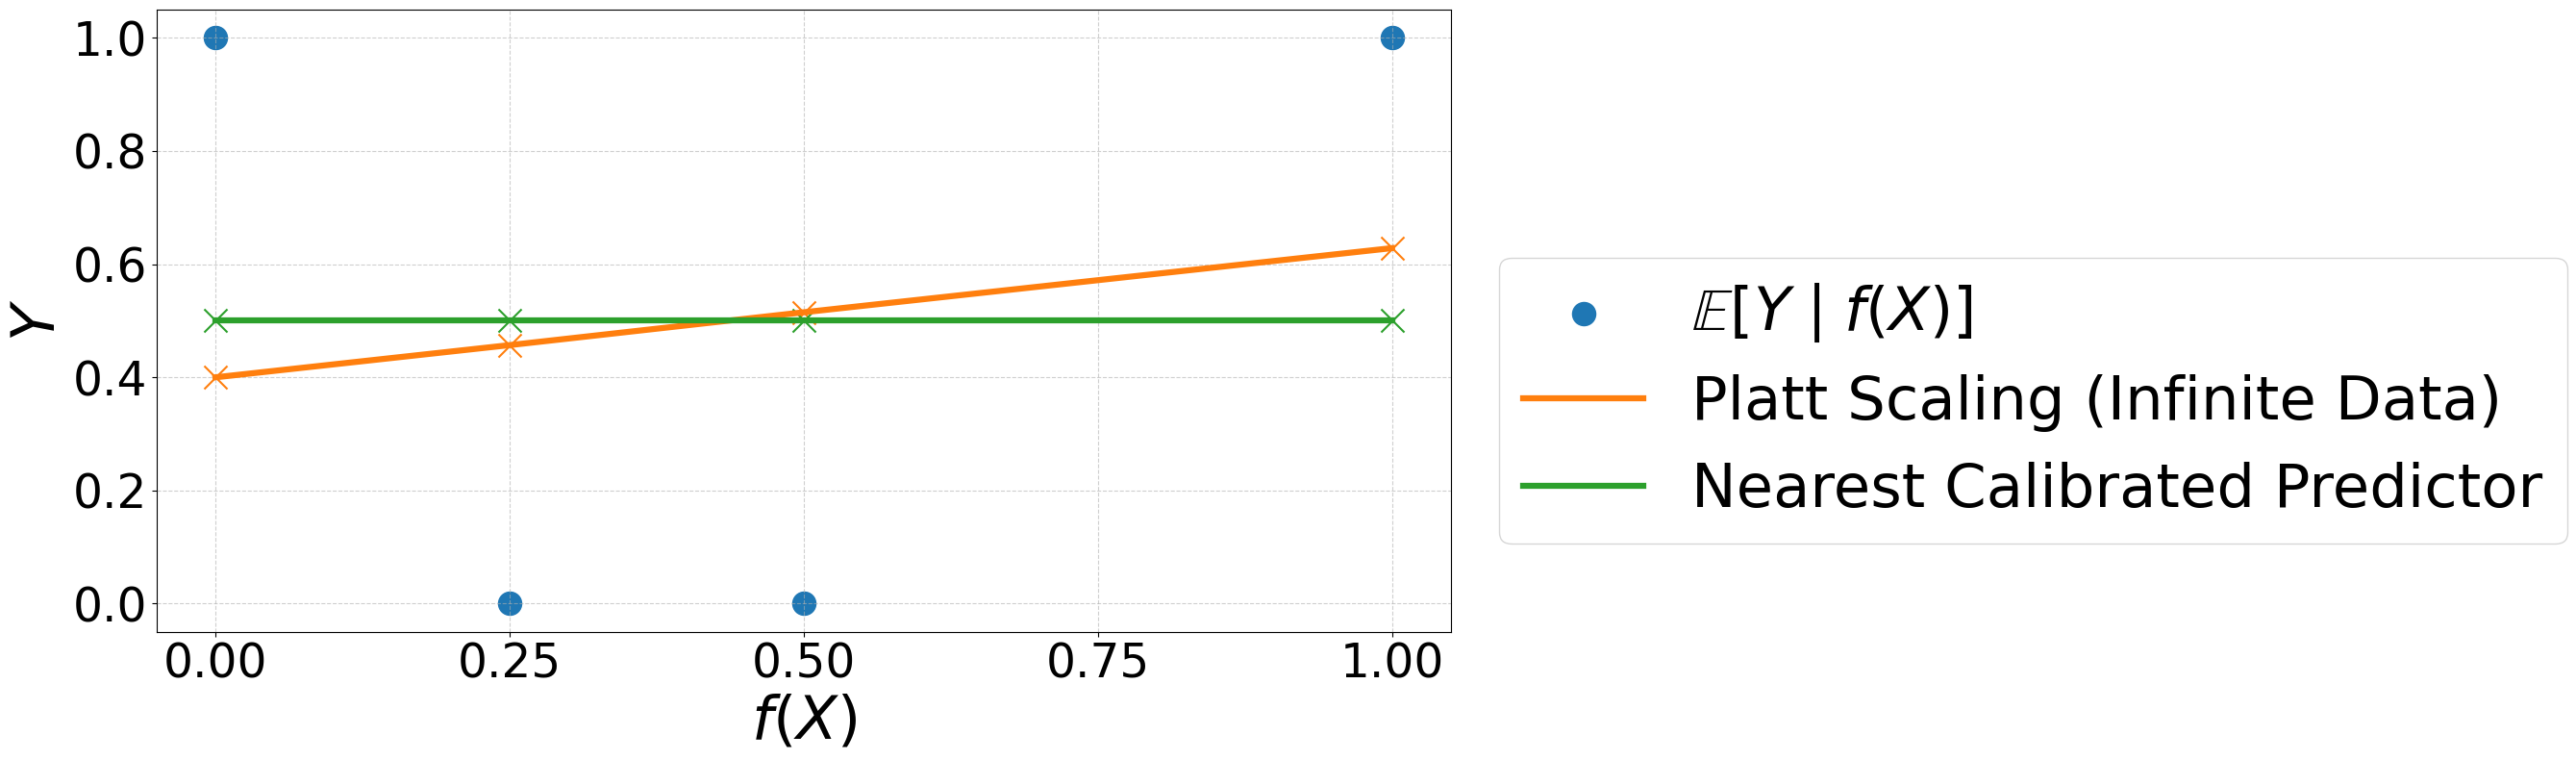

In [4]:
plt.figure(figsize=(32, 8))

plt.scatter(scatter1_x, scatter1_y, color='tab:blue', s=300, label=r'$\mathbb{E} [Y \mid f(X)]$', marker='o')
plt.plot(line1_x, line1_y, color='tab:orange', linewidth=4.5, label='Platt Scaling (Infinite Data)')
plt.scatter(line1_x, line1_y, color='tab:orange', s=300, marker='x')  # Add X markers
plt.plot(line2_x, line2_y, color='tab:green', linewidth=4.5, label='Nearest Calibrated Predictor')
plt.scatter(line2_x, line2_y, color='tab:green', s=300, marker='x')  # Add X markers

plt.xlabel(r'$f(X)$', fontsize=45)
plt.ylabel(r'$Y$', fontsize=45)
plt.xticks(np.arange(0, 1.1, 0.25), fontsize=35)
plt.yticks(fontsize=35)

plt.legend(fontsize=45, loc='upper center', bbox_to_anchor=(1.45, 0.65), ncol=1)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.savefig('platt_scaling_dce_hard.pdf', format="pdf", bbox_inches="tight")

plt.show()

